In [110]:
import sys
import os
import inspect
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from IPython.display import display

# Allow the display of all columns in the DataFrame
pd.options.display.max_columns = None

parentPath = '/'.join(sys.path[0].split('/')[:-1])

In [111]:
df = pd.read_csv(parentPath+'/data/pd___dfExpediaSample.csv')

In [112]:
# Using the display function allows for the viewing of all columns in DataFrame
display(df.head(8))

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-12-25 03:03:12,24,2,3,64,9448,NaN,2451,1,0,9,2015-02-05 00:00:00,2015-02-06 00:00:00,2,0,1,8785,1,0,1,6,105,35,2
1,2014-12-25 15:32:48,24,2,3,51,9527,NaN,2451,1,0,9,2015-02-06 00:00:00,2015-02-07 00:00:00,2,0,1,8785,1,0,1,6,105,35,29
2,2014-07-09 12:06:45,25,2,23,48,4924,NaN,3972,1,0,9,2014-08-09 00:00:00,2014-08-10 00:00:00,2,1,1,12216,6,0,1,2,50,365,72
3,2014-07-10 01:21:52,25,2,23,48,4924,NaN,3972,1,0,1,2014-08-13 00:00:00,2014-08-14 00:00:00,2,1,1,8278,1,0,1,2,50,368,41
4,2014-07-12 20:05:34,25,2,23,48,4924,NaN,3972,1,0,9,2014-08-13 00:00:00,2014-08-14 00:00:00,2,1,1,8278,1,0,1,2,50,368,68
5,2013-11-20 12:00:08,13,1,46,171,15334,5655.3159,4539,0,0,9,2014-07-31 00:00:00,2014-08-02 00:00:00,2,2,1,8250,1,0,2,2,50,628,1
6,2014-03-19 07:52:31,2,3,66,311,33705,2035.1640,6929,1,1,2,2014-03-31 00:00:00,2014-04-07 00:00:00,2,0,1,11334,1,0,2,4,96,201,33
7,2014-03-04 07:15:11,2,3,66,311,31592,1713.1043,7030,0,1,0,2014-05-06 00:00:00,2014-05-12 00:00:00,2,0,1,8791,1,0,4,4,8,110,87


In [113]:
df.shape

(375534, 24)

In [114]:
df.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

### Data Dictionary:

Column name	- Description

date_time - Timestamp

site_name - ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...)

posa_continent - ID of continent associated with site_name

user_location_country - The ID of the country the customer is located

user_location_region - The ID of the region the customer is located

user_location_city - The ID of the city the customer is located

orig_destination_distance - Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated

user_id - ID of user

is_mobile - 1 when a user connected from a mobile device, 0 otherwise

is_package - 1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise

channel - ID of a marketing channel

srch_ci - Checkin date

srch_co - Checkout date

srch_adults_cnt - The number of adults specified in the hotel room

srch_children_cnt - The number of (extra occupancy) children specified in the hotel room

srch_rm_cnt - The number of hotel rooms specified in the search

srch_destination_id - ID of the destination where the hotel search was performed

srch_destination_type_id - Type of destination

hotel_continent - Hotel continent

hotel_country - Hotel country

hotel_market - Hotel market

is_booking - 1 if a booking, 0 if a click

cnt -	Numer of similar events in the context of the same user session

hotel_cluster- ID of a hotel cluster

So, there are a lot of fields that have the incorrect datatypes assigned to them, so I will need to convert those to the correct types before taking a closer look at the data.

In [115]:
# Update the ID fields to be categorical features ***Data Prep Step***
df['site_name'] = df['site_name'].astype('category')
df['posa_continent'] = df['posa_continent'].astype('category')
df['user_location_country'] = df['user_location_country'].astype('category')
df['user_location_region'] = df['user_location_region'].astype('category')
df['user_location_city'] = df['user_location_city'].astype('category')
df['user_id'] = df['user_id'].astype('category')
df['channel'] = df['channel'].astype('category')
df['srch_destination_id'] = df['srch_destination_id'].astype('category')
df['srch_destination_type_id'] = df['srch_destination_type_id'].astype('category')
df['hotel_continent'] = df['hotel_continent'].astype('category')
df['hotel_country'] = df['hotel_country'].astype('category')
df['hotel_market'] = df['hotel_market'].astype('category')
df['hotel_cluster'] = df['hotel_cluster'].astype('category')

There are also boolean features that are currently passing for integers, so I will need to convert those to the correct types also.

In [116]:
# Update the boolean fields ***Data Prep Step***
df['is_mobile'] = df['is_mobile'].astype('bool')
df['is_package'] = df['is_package'].astype('bool')
df['is_booking'] = df['is_booking'].astype('bool')

There are also date features that are currently passing as objects, so I will need to convert those to the correct types also.

In [117]:
# Update the DtTm fields ***Data Prep Step***
df['date_time'] = pd.to_datetime(df['date_time'])
df['srch_ci'] = pd.to_datetime(df['srch_ci'])
df['srch_co'] = pd.to_datetime(df['srch_co'])

In [118]:
df.dtypes

date_time                    datetime64[ns]
site_name                          category
posa_continent                     category
user_location_country              category
user_location_region               category
user_location_city                 category
orig_destination_distance           float64
user_id                            category
is_mobile                              bool
is_package                             bool
channel                            category
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                category
srch_destination_type_id           category
is_booking                             bool
cnt                                   int64
hotel_continent                    category
hotel_country                      category
hotel_market                    

Exploratory Data Analysis Report on catgorical variables

In [119]:
# Subset the non-numeric features
dfcat = df.select_dtypes(exclude=[np.number])

# Create the categorical variable table
for i in range(0, len(dfcat.columns)):
    if i == 0:
        report = pd.DataFrame({
            'Variable Name': [dfcat.columns[i]],
            'Data Type': [str(dfcat.iloc[:,[i]].dtypes[0])],
            'Levels': [len(dfcat.iloc[:,i].unique())],
            'Missing Values': [dfcat.iloc[:,[i]].isna().sum().sum()],
            'Percent Missing': ['%.2f'%(dfcat.iloc[:,[i]].isna().sum().sum()/len(dfcat)*100)]
            })
    else:
        report.loc[len(report)] = {
            'Variable Name': dfcat.columns[i],
            'Data Type': str(dfcat.iloc[:,[i]].dtypes[0]),
            'Levels': len(dfcat.iloc[:,i].unique()),
            'Missing Values': dfcat.iloc[:,[i]].isna().sum().sum(),
            'Percent Missing': '%.2f'%(dfcat.iloc[:,[i]].isna().sum().sum()/len(dfcat)*100)
            }
report

,Variable Name,Data Type,Levels,Missing Values,Percent Missing
0,date_time,datetime64[ns],373833,0,0.00
1,site_name,category,42,0,0.00
2,posa_continent,category,5,0,0.00
3,user_location_country,category,220,0,0.00
4,user_location_region,category,864,0,0.00
5,user_location_city,category,18734,0,0.00
6,user_id,category,262116,0,0.00
7,is_mobile,bool,2,0,0.00
8,is_package,bool,2,0,0.00
9,channel,category,11,0,0.00


Immediately there are some variables that jump out to me as being problematic:

High cardinality variables, when converted to dummy variables, will result in an overwhelming number of input variables, which results in a smaller number of records that can populate each level. Therefore, inferences made my modeling with dummy variables with too few records will be noisy at best and can lead to model overfit.

So, I will need to remove the following features from the input dataset:

1. date_time (which is a date field which will not provide predictive power moving forward anyway)

2. user_id (which is a unique identifier)

3. user_location_city (which is detailed information that will directly correlate with user_location_region & country, thus not contribute additional information to the input dataset)

4. srch_ci  (which is a date field which will not provide predictive power moving forward anyway)

5. srch_co  (which is a date field which will not provide predictive power moving forward anyway)

6. srch_destination_id (which)

7. hotel_market (which is detailed information that will directly correlate with hotel_country, thus not contribute additional information to the input dataset)

8. user_location_region (in the same vein as hotel_market, this detailed information that will directly correlate with user_country, thus not contribute additional information to the input dataset, therefore we will be going with country pairs as out point-to-point relationship to use in our predictions)

In [120]:
# Remove the features outlined above ***Data Prep Step***

df.drop('date_time', axis=1, inplace=True)
df.drop('user_id', axis=1, inplace=True)
df.drop('user_location_city', axis=1, inplace=True)
df.drop('srch_ci', axis=1, inplace=True)
df.drop('srch_co', axis=1, inplace=True)
df.drop('srch_destination_id', axis=1, inplace=True)
df.drop('hotel_market', axis=1, inplace=True)
df.drop('user_location_region', axis=1, inplace=True)

Reproduce the categorical variable summary statistics

In [121]:
# Subset the non-numeric features
dfcat = df.select_dtypes(exclude=[np.number])

# Create the categorical variable table
for i in range(0, len(dfcat.columns)):
    if i == 0:
        report = pd.DataFrame({
            'Variable Name': [dfcat.columns[i]],
            'Data Type': [str(dfcat.iloc[:,[i]].dtypes[0])],
            'Levels': [len(dfcat.iloc[:,i].unique())],
            'Missing Values': [dfcat.iloc[:,[i]].isna().sum().sum()],
            'Percent Missing': ['%.2f'%(dfcat.iloc[:,[i]].isna().sum().sum()/len(dfcat)*100)]
            })
    else:
        report.loc[len(report)] = {
            'Variable Name': dfcat.columns[i],
            'Data Type': str(dfcat.iloc[:,[i]].dtypes[0]),
            'Levels': len(dfcat.iloc[:,i].unique()),
            'Missing Values': dfcat.iloc[:,[i]].isna().sum().sum(),
            'Percent Missing': '%.2f'%(dfcat.iloc[:,[i]].isna().sum().sum()/len(dfcat)*100)
            }
report

,Variable Name,Data Type,Levels,Missing Values,Percent Missing
0,site_name,category,42,0,0.00
1,posa_continent,category,5,0,0.00
2,user_location_country,category,220,0,0.00
3,is_mobile,bool,2,0,0.00
4,is_package,bool,2,0,0.00
5,channel,category,11,0,0.00
6,srch_destination_type_id,category,9,0,0.00
7,is_booking,bool,2,0,0.00
8,hotel_continent,category,6,0,0.00
9,hotel_country,category,196,0,0.00


Exploratory Data Analysis Report on numeric variables

In [122]:
# Subset the numeric features
dfnum = df[df.describe(include=[np.number]).columns]

# Create the numeric variable table
for i in range(0, len(dfnum.columns)):
    if i == 0:
        report = pd.DataFrame({
            'Variable Name': [dfnum.columns[i]],
            'Data Type': [str(dfnum.iloc[:,[i]].dtypes[0])],
            'Mean': round(np.mean(dfnum.iloc[:,[i]].dropna()).sum(), 2),
            'Standard Deviation': round(np.std(dfnum.iloc[:,[i]].dropna()).sum(), 2),
            'Skew.2SE': '%.2f'%(skew(dfnum.iloc[:,[i]])/(dfnum.iloc[:,[i]].sem()*2)),
            'Kurtosis.2SE': '%.2f'%(kurtosis(dfnum.iloc[:,[i]].dropna())[0]/(dfnum.iloc[:,[i]].sem()*2)),
            'Missing Values': [dfnum.iloc[:,[i]].isna().sum().sum()],
            'Percent Missing': ['%.2f'%(dfnum.iloc[:,[i]].isna().sum().sum()/len(dfnum)*100)]
            })
    else:
        report.loc[len(report)] = {
            'Variable Name': dfnum.columns[i],
            'Data Type': str(dfnum.iloc[:,[i]].dtypes[0]),
            'Mean': round(np.mean(dfnum.iloc[:,[i]].dropna()).sum(), 2),
            'Standard Deviation': round(np.std(dfnum.iloc[:,[i]].dropna()).sum(), 2),
            'Skew.2SE': '%.2f'%(skew(dfnum.iloc[:,[i]])/(dfnum.iloc[:,[i]].sem()*2)),
            'Kurtosis.2SE': '%.2f'%(kurtosis(dfnum.iloc[:,[i]].dropna())[0]/(dfnum.iloc[:,[i]].sem()*2)),
            'Missing Values': dfnum.iloc[:,[i]].isna().sum().sum(),
            'Percent Missing': '%.2f'%(dfnum.iloc[:,[i]].isna().sum().sum()/len(dfnum)*100)
            }
report

,Variable Name,Data Type,Mean,Standard Deviation,Skew.2SE,Kurtosis.2SE,Missing Values,Percent Missing
0,orig_destination_distance,float64,1967.65,2234.40,nan,0.24,134707,35.87
1,srch_adults_cnt,int64,2.03,0.91,781.22,3197.75,0,0.00
2,srch_children_cnt,int64,0.33,0.74,1064.12,3383.35,0,0.00
3,srch_rm_cnt,int64,1.11,0.46,4586.73,46748.59,0,0.00
4,cnt,int64,1.48,1.21,1492.19,19438.52,0,0.00


There are a significant number of missing values in origin_destination_distance.

In [123]:
# Impute orig_destination_distance by using the country-to-country pairs to recover an approximation of this information.
# ***Data Prep Step***

# df[df['orig_destination_distance'].isnull()][['orig_destination_distance', 'user_location_country', 'hotel_country']]

# ***Need to come back to this!!! In the meantime, I will drop the var***

df.drop('orig_destination_distance', axis=1, inplace=True)

Reproduce the numerical variable summary statistics

In [124]:
# Subset the numeric features
dfnum = df[df.describe(include=[np.number]).columns]

# Create the numeric variable table
for i in range(0, len(dfnum.columns)):
    if i == 0:
        report = pd.DataFrame({
            'Variable Name': [dfnum.columns[i]],
            'Data Type': [str(dfnum.iloc[:,[i]].dtypes[0])],
            'Mean': round(np.mean(dfnum.iloc[:,[i]].dropna()).sum(), 2),
            'Standard Deviation': round(np.std(dfnum.iloc[:,[i]].dropna()).sum(), 2),
            'Skew.2SE': '%.2f'%(skew(dfnum.iloc[:,[i]])/(dfnum.iloc[:,[i]].sem()*2)),
            'Kurtosis.2SE': '%.2f'%(kurtosis(dfnum.iloc[:,[i]].dropna())[0]/(dfnum.iloc[:,[i]].sem()*2)),
            'Missing Values': [dfnum.iloc[:,[i]].isna().sum().sum()],
            'Percent Missing': ['%.2f'%(dfnum.iloc[:,[i]].isna().sum().sum()/len(dfnum)*100)]
            })
    else:
        report.loc[len(report)] = {
            'Variable Name': dfnum.columns[i],
            'Data Type': str(dfnum.iloc[:,[i]].dtypes[0]),
            'Mean': round(np.mean(dfnum.iloc[:,[i]].dropna()).sum(), 2),
            'Standard Deviation': round(np.std(dfnum.iloc[:,[i]].dropna()).sum(), 2),
            'Skew.2SE': '%.2f'%(skew(dfnum.iloc[:,[i]])/(dfnum.iloc[:,[i]].sem()*2)),
            'Kurtosis.2SE': '%.2f'%(kurtosis(dfnum.iloc[:,[i]].dropna())[0]/(dfnum.iloc[:,[i]].sem()*2)),
            'Missing Values': dfnum.iloc[:,[i]].isna().sum().sum(),
            'Percent Missing': '%.2f'%(dfnum.iloc[:,[i]].isna().sum().sum()/len(dfnum)*100)
            }
report

,Variable Name,Data Type,Mean,Standard Deviation,Skew.2SE,Kurtosis.2SE,Missing Values,Percent Missing
0,srch_adults_cnt,int64,2.03,0.91,781.22,3197.75,0,0.00
1,srch_children_cnt,int64,0.33,0.74,1064.12,3383.35,0,0.00
2,srch_rm_cnt,int64,1.11,0.46,4586.73,46748.59,0,0.00
3,cnt,int64,1.48,1.21,1492.19,19438.52,0,0.00


Take a look at the correlations between these numerical variables to ensure no two predictors are too highly correlated, this introducing multicollinearity in our models.

In [125]:
# correlation matrix looking only at the predictor variable
corr = dfnum.corr()

corr

,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cnt
srch_adults_cnt,1.000000,0.107778,0.509680,0.014422
srch_children_cnt,0.107778,1.000000,0.089067,0.019313
srch_rm_cnt,0.509680,0.089067,1.000000,-0.001313
cnt,0.014422,0.019313,-0.001313,1.000000


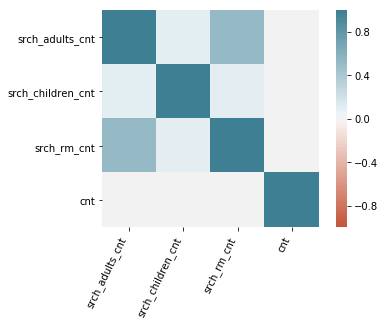

In [126]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=64,
    horizontalalignment='right'
);

No variables are too highly correlated with one another.

In [ ]:
df = pd.read_csv(parentPath+'/data/pd_CleansedDataset.csv')